In [1]:
import pandas as pd
from master_thesis.src import utils
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
EMOTION = utils.PROJECT_ROOT / 'master_thesis' / 'experiments' / 'emotion'
#emo = pd.read_csv(EMOTION / 'jemas_vo.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen200000.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen100000.tsv', sep = '\t', index_col = 0)
emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen10000.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen5000.tsv', sep = '\t', index_col = 0)



In [3]:
emo.head()

,nr_tokens_publisher,nr_tokens_text,pageviews,article_text,rubric,bounces,date,prozentDpa,exits,category,...,timeOnPage,avgTimeOnPage_percentile,publisher,avgTimeOnPagePerWordcount,avgTimeOnPage,entrances,valence,arousal,dominance,token_recognition
articleId,,,,,,,,,,,,,,,,,,,,,
SZ_16591,535,535,2411,Coburg Sehr viele Eltern haben eine Vollmacht ...,recht,76,NaN,NaN,1382,sz-spezial,...,48968.0,56.993679,SZ,0.088949,47.587949,1382,5.640,3.957,5.538,0.325
SZ_16595,250,250,92,Berlin Das Verwaltungsgericht Berlin hat entsc...,recht,6,NaN,NaN,40,sz-spezial,...,2123.0,47.765865,SZ,0.163308,40.826923,41,5.385,3.973,5.494,0.257
SZ_16723,231,231,567,Coburg Nicht jeder Rohrbruch ist versichert: B...,recht,26,NaN,NaN,308,sz-spezial,...,9972.0,43.811973,SZ,0.166675,38.501931,308,4.512,4.007,4.835,0.231
SZ_17146,785,785,101,Alfons Hewener heiratete erst spät. Wadgassen....,momente,1,NaN,NaN,36,magazine,...,6386.0,84.367253,SZ,0.125154,98.246154,38,5.546,4.008,5.449,0.236
SZ_17184,398,398,261,München Ein Käufer kann erst dann von einem Ka...,recht,9,NaN,NaN,124,sz-spezial,...,9702.0,74.262519,SZ,0.177933,70.817518,125,5.081,3.968,5.334,0.332


In [4]:
emo = emo[["article_text", "nr_tokens_text", "publisher",
           "avgTimeOnPage", "avgTimeOnPage_percentile", "avgTimeOnPagePerWordcount", 
           "pageviews", "pageviews_percentile", 
           "valence", "arousal", "token_recognition"]]

In [5]:
emo.shape

(97760, 11)

In [6]:
emo.describe()

,nr_tokens_text,avgTimeOnPage,avgTimeOnPage_percentile,avgTimeOnPagePerWordcount,pageviews,pageviews_percentile,valence,arousal,token_recognition
count,97760.000000,97760.000000,97760.000000,97760.000000,9.776000e+04,97760.000000,97760.000000,97760.000000,97760.000000
mean,458.718290,115.757008,50.001534,0.347308,1.380539e+03,50.001534,5.285134,3.959669,0.204490
std,281.634442,114.728459,28.867661,0.485900,7.749221e+03,28.867603,0.307214,0.148556,0.054618
min,7.000000,0.071429,0.002273,0.000233,5.200000e+01,0.002273,2.590000,3.360000,0.000000
25%,255.000000,38.709619,25.001704,0.093930,1.610000e+02,24.942675,5.125000,3.861000,0.171000
50%,431.000000,90.471658,50.001136,0.243216,3.130000e+02,49.992253,5.320000,3.940000,0.204000
75%,601.000000,164.654167,75.000568,0.445646,8.890000e+02,75.009090,5.492000,4.034000,0.238000
max,12170.000000,3761.362903,100.000000,23.902171,1.087521e+06,100.000000,6.867000,5.545000,0.556000


In [7]:
len(emo[emo.token_recognition > 0.2])

51759

In [8]:
#emo.sort_values('valence', ascending = True)[emo.token_recognition > 0.3].head(10)
emo.sort_values('arousal', ascending = False)[emo.token_recognition > 0.3]

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,article_text,nr_tokens_text,publisher,avgTimeOnPage,avgTimeOnPage_percentile,avgTimeOnPagePerWordcount,pageviews,pageviews_percentile,valence,arousal,token_recognition
articleId,,,,,,,,,,,
NOZ_2129082,Kriminalität: Mutmaßlicher Täter nach tödliche...,86,NOZ,91.351064,8.633306,1.062222,192,23.133124,3.770,4.827,0.333
NOZ_2110547,In Niedersachsen: Polizei in Einbeck sucht mit...,85,NOZ,163.064140,46.211708,1.918402,2426,87.185256,4.117,4.808,0.378
NOZ_2012621,Frau schwer verletzt: Zwei Autos kollidieren i...,53,NOZ,114.889091,17.405236,2.167719,1696,82.040269,3.437,4.789,0.310
NOZ_1968941,Kollision mit Auto: Fahrradfahrer bei Unfall i...,69,NOZ,96.544937,10.094537,1.399202,2713,88.545360,3.618,4.767,0.394
NOZ_2117766,Kriminalität: 42-Jähriger nach nächtlichem Str...,88,NOZ,102.752427,12.185256,1.167641,603,61.640987,3.944,4.746,0.340
...,...,...,...,...,...,...,...,...,...,...,...
SZ_51699601,St. Wendel SZ-Leser-Reporter waren dieser Tage...,80,SZ,22.805556,11.917452,0.285069,138,21.479921,5.208,3.656,0.333
NOZ_1636137,Welcher Geistliche trägt welchen Titel?: Pasto...,434,NOZ,704.111913,98.859195,1.622378,23705,99.434142,5.274,3.654,0.343
SZ_49645217,Die Zahl der Infizierten im St. Wendeler Land ...,72,SZ,31.482109,29.821517,0.437252,2061,88.857214,5.363,3.622,0.306


In [9]:
ID = 'NOZ_1021778'
print(emo.loc[ID, 'article_text'])

Serie zur organisierten Kriminalität: Drogen, Waffen, Sex: So verdienen die größten Clans ihr Geld Von Melanie Heike Schmidt und Marion Trimborn mhs/trim Osnabrück. Sie nennen sich „Ehrenwerte Gesellschaft“ oder „Diebe im Gesetz“: Familienclans und Banden, die die Welt des organisierten Verbrechens beherrschen. Ihr Geld verdienen sie mit Drogen, Waffen, Sex und Erpressung - über Grenzen hinweg. Das Geschäft boomt, rund 800 Milliarden Euro Umsatz machen Mafia, Yakuza & Co. Die größten Banden im Überblick. Das Geschäft boomt, rund 800 Milliarden Euro Umsatz machen Mafia, Yakuza & Co. Die größten Banden im Überblick.


In [10]:
#emo[(emo.valence < -1) & (emo.arousal > 2.5)]
emo[(emo.valence < 5) & (emo.arousal > 3)]


,article_text,nr_tokens_text,publisher,avgTimeOnPage,avgTimeOnPage_percentile,avgTimeOnPagePerWordcount,pageviews,pageviews_percentile,valence,arousal,token_recognition
articleId,,,,,,,,,,,
SZ_16723,Coburg Nicht jeder Rohrbruch ist versichert: B...,231,SZ,38.501931,43.811973,0.166675,567,70.071579,4.512,4.007,0.231
SZ_17228,Mainz Das Landessozialgericht hat die Menschen...,200,SZ,62.178218,69.726078,0.310891,379,60.572633,4.997,4.121,0.202
SZ_17232,Frankenthal Schreck im Stadtverkehr: Plötzlich...,361,SZ,41.269815,48.503347,0.114321,1325,83.843580,4.898,3.937,0.296
SZ_17295,Koblenz Richter halten den Einsatz eines Funke...,334,SZ,36.602041,40.273302,0.109587,206,40.248513,4.593,4.009,0.335
SZ_17462,München Es kann jeden treffen. Einen Moment ni...,481,SZ,50.258621,59.850645,0.104488,189,36.626177,4.986,3.877,0.322
...,...,...,...,...,...,...,...,...,...,...,...
NOZ_2138220,Kriminalität: Schaffner erleidet Herzinfarkt n...,250,NOZ,135.392157,28.461049,0.541569,113,6.782338,4.466,4.294,0.221
NOZ_2138251,Handgemenge in Bayern: Busfahrer schmeißt Mask...,165,NOZ,82.976834,6.592582,0.502890,648,63.380602,4.822,4.041,0.213
NOZ_2138370,Gesundheit: Kreis Vechta überschreitet Corona-...,593,NOZ,189.042254,62.576129,0.318790,141,12.674984,4.998,3.998,0.191


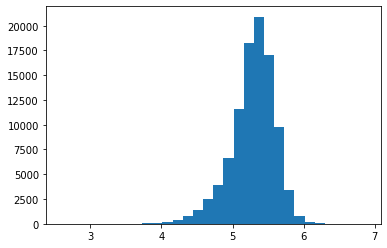

In [11]:
plt.hist(emo.valence, 30)
plt.show()

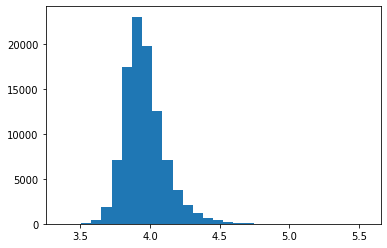

In [12]:
plt.hist(emo.arousal, 30)
plt.show()

In [13]:
full = utils.get_raw_df()

Shared columns: {'pageviews', 'avgTimeOnPage_percentile', 'zeilen', 'date', 'avgTimeOnPagePerWordcount', 'bounces', 'avgTimeOnPage', 'pagePath', 'avgTimeOnPagePerWordcount_percentile', 'rubric', 'dpaGuid', 'category', 'prozentVerlag', 'article_text', 'timeOnPage', 'nr_tokens_text', 'nr_tokens_publisher', 'pageviews_percentile', 'publisher', 'exits', 'titel', 'entrances', 'prozentDpa'}
Shape of raw df: (90459, 23)


In [17]:
# deprecated, df emo already has everything
# append the emotional values
full['valence'] = emo.valence
full['arousal'] = emo.arousal
full['token_recognition'] = emo.token_recognition

In [42]:
df = full[full.publisher == "NOZ"]
df = df[df.nr_tokens_text >= 100]

df = df[df.nr_tokens_text <= 1000]
df.shape

(34440, 26)

In [43]:
#df = full[full.token_recognition >= 0.35]
#df.shape

In [44]:
df.head()

,pageviews,avgTimeOnPage_percentile,zeilen,date,avgTimeOnPagePerWordcount,bounces,avgTimeOnPage,pagePath,avgTimeOnPagePerWordcount_percentile,rubric,...,nr_tokens_publisher,pageviews_percentile,publisher,exits,titel,entrances,prozentDpa,valence,arousal,token_recognition
articleId,,,,,,,,,,,,,,,,,,,,,
NOZ_32,99,44.661849,NaN,NaN,0.824489,1,160.775281,NaN,86.280793,osnabrueck,...,195,3.992819,NOZ,10,Ein Song für Elias: Herzlake: Civil Courage gi...,8,NaN,5.848,3.994,0.238
NOZ_56,473,83.785565,NaN,NaN,1.022060,18,242.228288,NaN,91.725752,bad-essen,...,237,55.223389,NOZ,70,Wechsel zu Preußen Münster: Michael Holt verlä...,65,NaN,5.341,3.887,0.161
NOZ_186,117,13.321516,NaN,NaN,0.167320,2,105.578947,NaN,4.576857,politik,...,631,7.674302,NOZ,60,Wer bekam 2012 wie viel?: EU-Agrarförderung: D...,14,NaN,5.471,3.833,0.257
NOZ_374,5874,97.420689,NaN,NaN,2.628266,1157,473.087912,NaN,99.372784,osnabrueck,...,180,95.459504,NOZ,5328,Komischer Beigeschmack: Warum wird geschnitten...,5381,NaN,5.073,3.995,0.183
NOZ_409,283,97.141169,NaN,NaN,1.695523,80,449.313725,NaN,98.006999,osnabrueck,...,265,37.851104,NOZ,232,Nachweis für alle Rassen: Hundeführerschein is...,232,NaN,4.938,3.894,0.242


(-0.039653667137447474, 1.8176996150801473e-13)


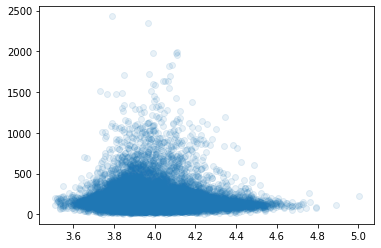

In [45]:
plt.scatter(df.arousal, df.avgTimeOnPage, alpha = 0.1)
print(st.pearsonr(df.arousal, df.avgTimeOnPage))

(0.04063219652569337, 4.579748163327325e-14)


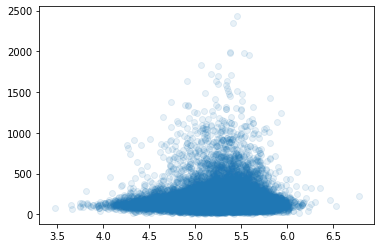

In [46]:
plt.scatter(df.valence, df.avgTimeOnPage, alpha = 0.1)
print(st.pearsonr(df.valence, df.avgTimeOnPage))

(0.12241381388016677, 4.3253156793929265e-115)


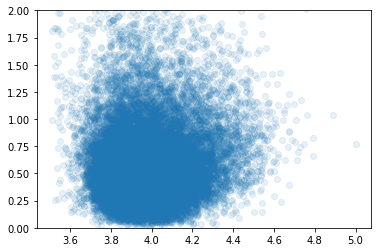

In [47]:
plt.scatter(df.arousal, df.avgTimeOnPagePerWordcount, alpha = 0.1)
plt.ylim(0,2)
print(st.pearsonr(df.arousal, df.avgTimeOnPagePerWordcount))

(0.06336705089725947, 5.502113247348428e-32)


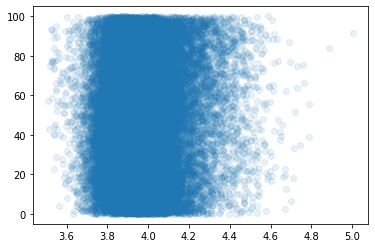

In [48]:
plt.scatter(df.arousal, df.pageviews_percentile, alpha = 0.1)
print(st.pearsonr(df.arousal, df.pageviews_percentile))

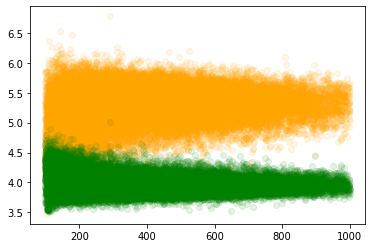

In [49]:
plt.scatter(df.nr_tokens_text, df.valence, alpha = 0.1, color = "orange")
plt.scatter(df.nr_tokens_text, df.arousal, alpha = 0.1, color = "green")


# je länger der Text, desto "neutralisierter" wird der Wert... --> zu viel gemittelt!

In [50]:
print(st.pearsonr(df.arousal, df.pageviews))
print(st.pearsonr(df.arousal, df.pageviews_percentile))
print(st.pearsonr(df.arousal, df.avgTimeOnPage))
print(st.pearsonr(df.arousal, df.avgTimeOnPage_percentile))

print("---")
print(st.pearsonr(df.valence, df.pageviews))
print(st.pearsonr(df.valence, df.pageviews_percentile))
print(st.pearsonr(df.valence, df.avgTimeOnPage))
print(st.pearsonr(df.valence, df.avgTimeOnPage_percentile))
# hm schade, irgendwie korreliert da nichts...

(0.024205986907239112, 7.034354190974456e-06)
(0.06336705089725947, 5.502113247348428e-32)
(-0.039653667137447474, 1.8176996150801473e-13)
(-0.10786757934748259, 1.197589891855331e-89)
---
(-0.03538853863161922, 5.057604624988115e-11)
(-0.17750006420037576, 9.65699447352687e-242)
(0.04063219652569337, 4.579748163327325e-14)
(0.07269593796692188, 1.396925154998592e-41)


In [28]:
df.publisher.value_counts()

NOZ    44004
SZ     32272
TV     21484
Name: publisher, dtype: int64

In [29]:
# one publisher

In [30]:
for p in df.publisher.unique():
    print(p)
    tmp = df[df.publisher == p]
    print("arousal:")
    for c in ["avgTimeOnPagePerWordcount", "avgTimeOnPage", "avgTimeOnPage_percentile", 
              "pageviews", "pageviews_percentile"]:
        print(c)
        print("\t", st.pearsonr(tmp.arousal, tmp[c]))

    print("valence:")
    for c in ["avgTimeOnPagePerWordcount", "avgTimeOnPage", "avgTimeOnPage_percentile", 
              "pageviews", "pageviews_percentile"]:
        print(c)
        print("\t", st.pearsonr(tmp.valence, tmp[c]))
   
    print("------")

SZ
arousal:
avgTimeOnPagePerWordcount
	 (0.05398498148996227, 2.8768426834087885e-22)
avgTimeOnPage
	 (0.02904941623742831, 1.7945012544770857e-07)
avgTimeOnPage_percentile
	 (0.00501582506173783, 0.3675701854455771)
pageviews
	 (-0.001885308600812532, 0.7348570356907166)
pageviews_percentile
	 (0.03279582921742116, 3.79398344220671e-09)
valence:
avgTimeOnPagePerWordcount
	 (-0.20311552611921424, 1.295665803661421e-297)
avgTimeOnPage
	 (-0.10055607214208043, 2.6807952923504622e-73)
avgTimeOnPage_percentile
	 (-0.07571142162080896, 3.040094503845006e-42)
pageviews
	 (-0.06419961856147421, 7.865629553377661e-31)
pageviews_percentile
	 (-0.21969081189289572, 0.0)
------
TV
arousal:
avgTimeOnPagePerWordcount
	 (0.11289275551197653, 7.051926379145421e-62)
avgTimeOnPage
	 (-0.02369277175259536, 0.0005146086311776247)
avgTimeOnPage_percentile
	 (-0.024139649721669494, 0.00040231601348209684)
pageviews
	 (0.03375484267230669, 7.470629123405216e-07)
pageviews_percentile
	 (0.0670547965579371, 7

auch innerhalb eines Publishers kaum Korrelation...

am ehesten noch: je höher valence desto kleinere Klickzahlen

bei NOZ auch: je höher Arousal desto größer avgTimeOnPagePerWordcount...